In [3605]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3606]:
df=pd.read_csv("titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3607]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3609]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3610]:
df[df["Embarked"].isnull()] #here we found the 2 missing values ,rows
##MCAR


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [3611]:
#missing not at the random
df["Survived"].value_counts()
#0=not survived,1=survived



0    549
1    342
Name: Survived, dtype: int64

In [3612]:
df=pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [3614]:
df.isnull().sum()#there is 177 missing values in age//how we handle::we are using median

Survived      0
Age         177
Fare          0
dtype: int64

In [3615]:
median=df.Age.median()
median

28.0

In [3616]:
df["age_median"] =df["Age"].fillna(median)
df

,Survived,Age,Fare,age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [3617]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
age_median      0
dtype: int64

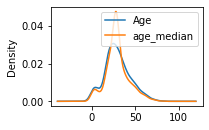

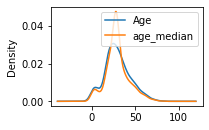

In [3618]:
fig=plt.figure()
ax=fig.add_subplot(2,2,1)
df["Age"].plot(kind="kde")
df["age_median"].plot(kind="kde")
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

fig=plt.figure()
ax=fig.add_subplot(2,2,1)
df["Age"].plot(kind="kde")
df["age_median"].plot(kind="kde")
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")
plt.show()

<AxesSubplot:ylabel='Frequency'>

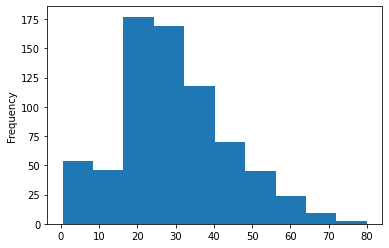

In [3619]:
df["Age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

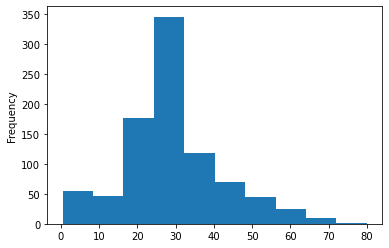

In [3620]:
df["age_median"].plot(kind="hist")

In [3621]:
df["Age"].tolist()

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 nan,
 54.0,
 2.0,
 27.0,
 14.0,
 4.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 2.0,
 nan,
 31.0,
 nan,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 nan,
 19.0,
 nan,
 nan,
 40.0,
 nan,
 nan,
 66.0,
 28.0,
 42.0,
 nan,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 nan,
 3.0,
 19.0,
 nan,
 nan,
 nan,
 nan,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 65.0,
 nan,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 4.0,
 nan,
 nan,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 nan,
 nan,
 0.83,
 30.0,
 22.0,
 29.0,
 nan,
 28.0,
 17.0,
 33.0,
 16.0,
 nan,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 nan,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 nan,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 nan,
 38.0,
 nan,
 47.0,
 14.5,
 22.0,
 20.0,
 17.0,
 21.0,
 70.5,
 29.0,
 24.0,
 2.0,
 21.0,
 nan,
 32.5,
 32.5,
 54.0,
 12.0,
 nan,
 24.0,
 nan,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 nan,
 22.0,
 24.0,
 19.0,
 18.0,
 19.0,
 27.0,
 9.0,
 36

In [3622]:
df["Age"].median()

28.0

In [3623]:
df["Age"].__len__()

891

In [3624]:
891-177

714

In [3625]:
#22nd April
# Creating the new feature with respect to Median //VARIABLE IS COLUMN NAME
#function will take care of the NAN
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [3626]:
df["age_median"] =df["Age"].fillna(median)
df

,Survived,Age,Fare,age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [3627]:
impute_nan(df,"Age",median)

In [3628]:
df.head()

,Survived,Age,Fare,age_median,Age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


#RANDOM SAMPLE IMPUTATION

df=pd.read.csv("titanic.csv",usecols=("Survived","Age","Fare"))

In [3629]:
df.head()

,Survived,Age,Fare,age_median,Age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [3630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         714 non-null    float64
 2   Fare        891 non-null    float64
 3   age_median  891 non-null    float64
 4   Age_median  891 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 34.9 KB


In [3631]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
age_median      0
Age_median      0
dtype: int64

In [3632]:
df["Age"].dropna().sample()#

590    35.0
Name: Age, dtype: float64

In [3633]:
ransam=df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)#to make it constant use random state=0

In [3634]:
df["Age"].dropna().sample(df["Age"].isnull().sum())

441    20.00
652    21.00
257    30.00
452    30.00
469     0.75
       ...  
734    23.00
296    23.50
472    33.00
787     8.00
66     29.00
Name: Age, Length: 177, dtype: float64

In [3635]:
ransam#it will get rows have values//we get random valus by taking randsom sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [3636]:
df[df["Age"].isnull()].index#index must be same while imputing the random sample//for that
#first strip is find the null value index //row number 

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [3637]:
df.loc[17]#loc is used for indexing//to fill the random variables ,we need to find the index of the column//

Survived       1.0
Age            NaN
Fare          13.0
age_median    28.0
Age_median    28.0
Name: 17, dtype: float64

In [3638]:
ransam.index = df[df["Age"].isnull()].index #we are replacing ransam index with the df[df["Age"].isnull()].index
#here values remain same but index change 

In [3639]:
ransam

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [3640]:
df.loc[df["Age"].isnull(),'Age']=ransam # loc used to specify location //df["Age"].isnull() its row
#"age"--index

In [3641]:
df.isnull().sum()

Survived      0
Age           0
Fare          0
age_median    0
Age_median    0
dtype: int64

In [3642]:
def impute_nan(df,variable,median):
    df[variable+ "-median"]=df[variable].fillna(median)#new column
    df[variable+"_random"]=df[variable]#new column
    ransam=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ransam.index = df[df["Age"].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=ransam

In [3643]:
impute_nan(df,"Age",median)

In [3644]:
df

,Survived,Age,Fare,age_median,Age_median,Age-median,Age_random
0,0,22.0,7.2500,22.0,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0,35.0
...,...,...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0,27.0,27.0
887,1,19.0,30.0000,19.0,19.0,19.0,19.0
888,0,15.0,23.4500,28.0,28.0,15.0,15.0
889,1,26.0,30.0000,26.0,26.0,26.0,26.0


<AxesSubplot:ylabel='Density'>

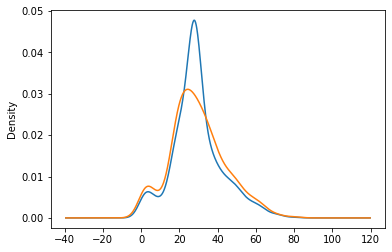

In [3645]:
#df["Age"].plot(kind="kde")
df["Age_median"].plot(kind="kde")
df["Age_random"].plot(kind="kde")

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work

##### 3.  Capturing NAN values with a new feature

By this Approch we will get tyhe importance of the missing value

It works well if the data are not missing completely at random 

In [3646]:
del df["Age"]#delete a column

In [3647]:
df

,Survived,Age,Fare,age_median,Age_median,Age-median,Age_random
0,0,22.0,7.2500,22.0,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0,35.0
...,...,...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0,27.0,27.0
887,1,19.0,30.0000,19.0,19.0,19.0,19.0
888,0,15.0,23.4500,28.0,28.0,15.0,15.0
889,1,26.0,30.0000,26.0,26.0,26.0,26.0


In [3648]:
#df.pop("Age")

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    15.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64